# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")
#libraries to load and manipulate data
import numpy as np
import pandas as pd
#libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
#library to normalize data
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
stock_data = pd.read_csv('/content/drive/My Drive/PGDSBA/stock_data.csv')

Creating a copy of the data

In [4]:
data = stock_data.copy()

## Data Overview

- Observations
- Sanity checks

#### Checking the rows and columns of data

In [5]:
data.head() #displays first 5 rows of the dataset

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.35000,9.99999,1.68715,135,51,-604000000,7610000000,11.39000,668129938.50000,3.71817,-8.78422
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24000,8.33943,2.19789,130,77,51000000,5144000000,3.15000,1633015873.00000,18.80635,-8.75007
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91000,11.30112,1.27365,21,67,938000000,4423000000,2.94000,1504421769.00000,15.27551,-0.39417
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94000,13.97720,1.35768,9,180,-240840000,629551000,1.26000,499643650.80000,74.55556,4.19965
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32000,-1.82786,1.70117,14,272,315120000,696878000,0.31000,2247993548.00000,178.45161,1.05981


In [6]:
data.tail() #displays last 5 rows of the dataset

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.26000,14.88773,1.84515,15,459,-1032187000,-4359082000,-4.64000,939457327.60000,28.97619,6.26177
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.51618,-8.69892,1.47888,142,27,159000000,1293000000,2.97000,435353535.40000,17.68221,-3.83826
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.59000,9.34768,1.40421,1,100,376000000,147000000,0.78000,188461538.50000,131.52564,-23.88445
338,ZION,Zions Bancorp,Financials,Regional Banks,27.30000,-1.15859,1.46818,4,99,-43623000,309471000,1.20000,257892500.00000,22.75000,-0.06310
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.92000,16.67884,1.61028,32,65,272000000,339000000,0.68000,498529411.80000,70.47059,1.72307


From head() and tail(), we see that the data was loaded properly.

#### Checking the shape of data and test_data

In [7]:
data.shape #gives (no. of rows, columns) in dataset

(340, 15)

The given dataset has 340 rows and 15 columns.

#### Checking the datatypes of columns

In [8]:
data.info() #gives the datatype of each column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 14 independent variables in the given dataset.
- `Ticker Symbol`, `Security`, `GICS Sector` and `GICS Sub Industry` are of object data type.
- `Current Price`, `Price Change`, `Volatility`, `Earnings Per Share`, `Estimated Shares Outstanding`, `P/E Ratio`, `P/B Ratio` are of float 64 data type.
- `ROE`, `Cash Ratio`, `Net Cash Flow`, `Net Income` are of int64 data type. 

#### Checking for missing values

In [9]:
data.isnull().any().value_counts() #checking for missing data

False    15
dtype: int64

In [10]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

- There are no missing values in the given dataset.

#### Checking for duplicate data

In [12]:
data.duplicated().sum() #checking for duplicate data

0

- We observe that there are no duplicates in the data.

#### Statistical summary of the dataset

In [13]:
data.describe(include='all').T #gives the statistical summary of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.00000,NaN,NaN,NaN,80.86234,98.05509,4.50000,38.55500,59.70500,92.88000,1274.94995
Price Change,340.00000,NaN,NaN,NaN,4.07819,12.00634,-47.12969,-0.93948,4.81950,10.69549,55.05168
Volatility,340.00000,NaN,NaN,NaN,1.52598,0.59180,0.73316,1.13488,1.38559,1.69555,4.58004
ROE,340.00000,NaN,NaN,NaN,39.59706,96.54754,1.00000,9.75000,15.00000,27.00000,917.00000
Cash Ratio,340.00000,NaN,NaN,NaN,70.02353,90.42133,0.00000,18.00000,47.00000,99.00000,958.00000
Net Cash Flow,340.00000,NaN,NaN,NaN,55537620.58824,1946365312.17579,-11208000000.00000,-193906500.00000,2098000.00000,169810750.00000,20764000000.00000


- Most of the stocks are from the Industrials GICS sector, and Oil & Gas Exploration & Production sub industry.
- Mean current stock price in dollars is 80.86, and the average earningsper share is 2.77.
- ROE and cash ratio have a wide range of values, and certain stocks have values higher than the 75th percentile. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

#### Plotting histograms and boxplots for all numerical variables

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
data.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [5]:
num_cols = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 
            'Net Cash Flow', 'Net Income', 'Earnings Per Share',
            'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

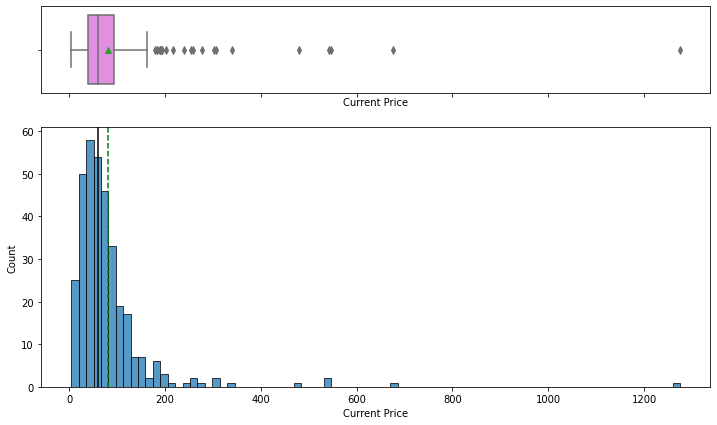

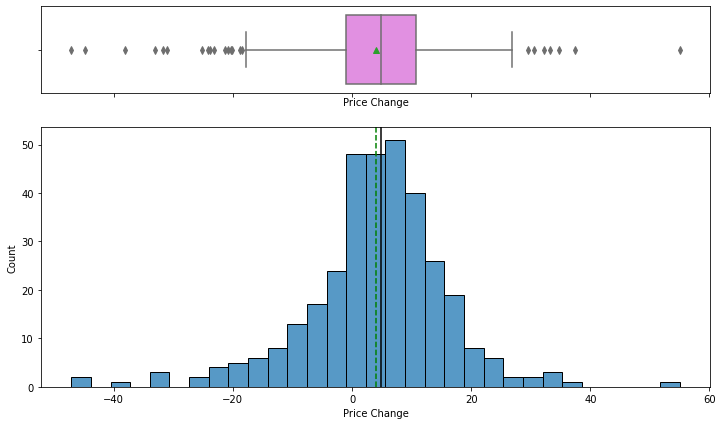

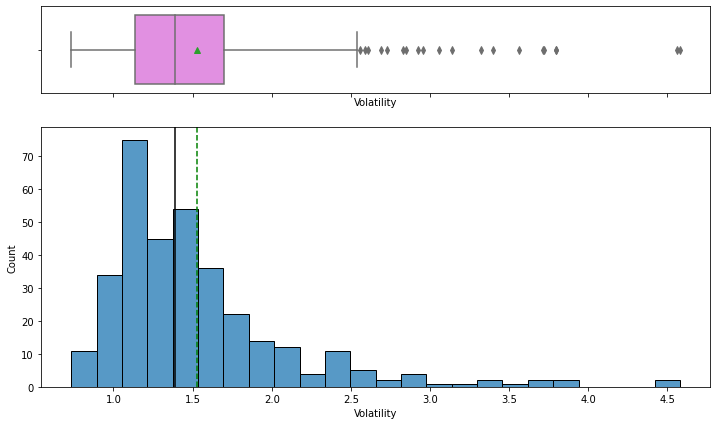

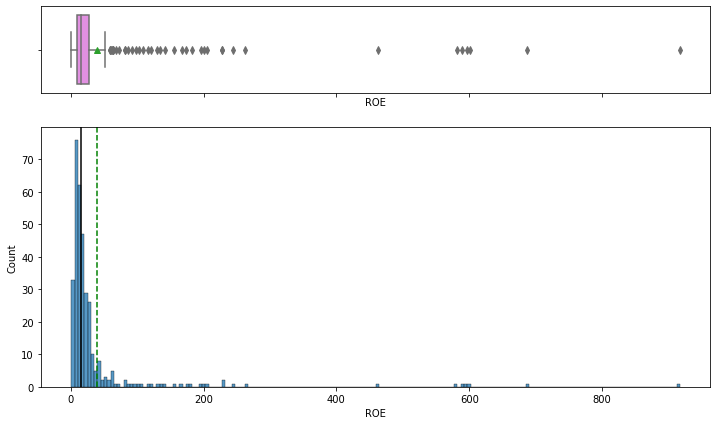

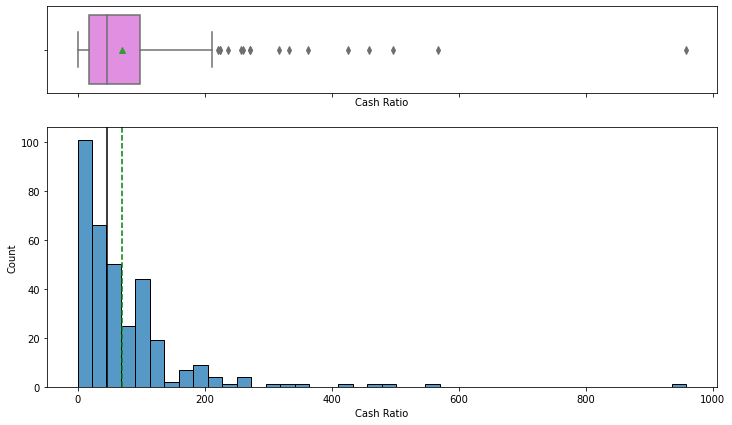

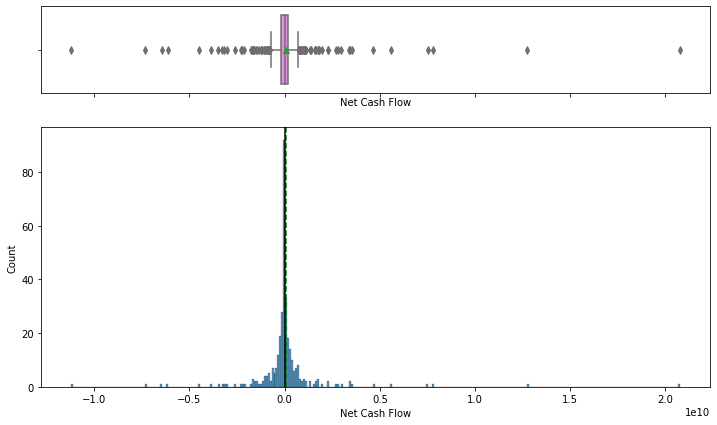

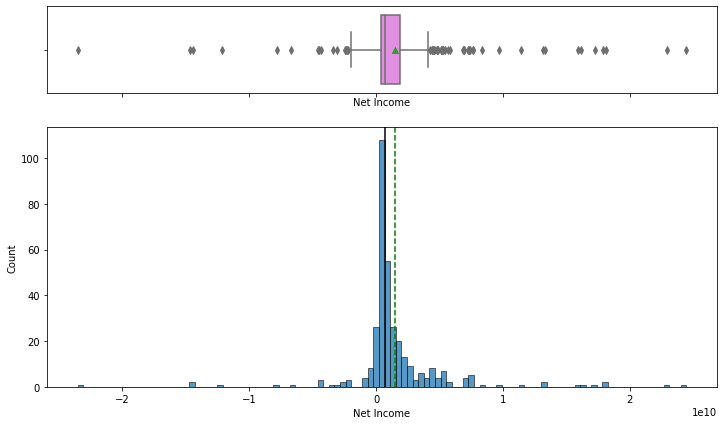

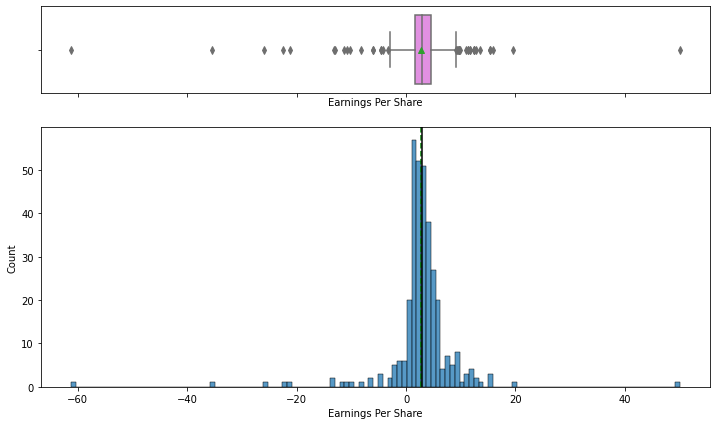

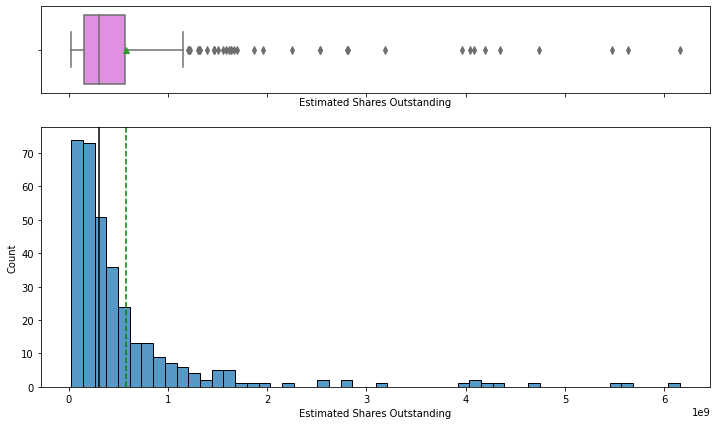

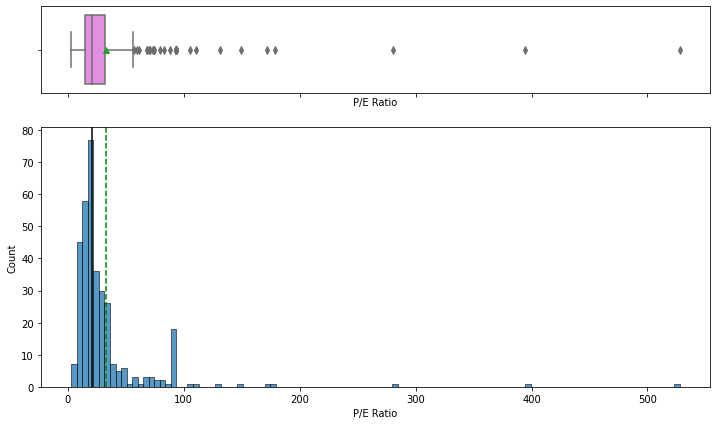

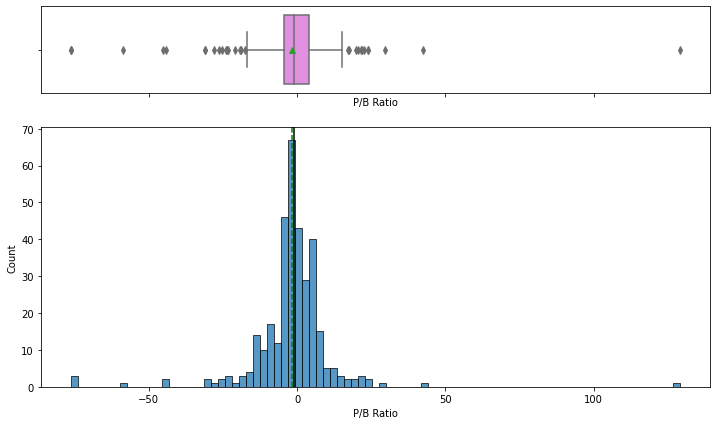

In [17]:
for column in num_cols:
  histogram_boxplot(data, column)

- Plots for `Current Price`, `Volatility`, `ROE`, `Cash Ratio`, `Estimated Shares Outstanding`, `P/E Ratio` are heavily right skewed.
- Plots for `Price Change`, `Net Cash Flow`, `Net Income`, `Earnings Per Share`, `P/B Ratio` look similar to the normal curve.
- There are outliers in the boxplots. Since these are genuine values, we will not treat them.




#### Plotting categorical variables

In [18]:
# function to draw barplot for categorical data
def plot_categorical_feature(data, attribute):
  plt.title('Plot of categories in ' + attribute)
  plot = sns.countplot(data=data, x=attribute, palette='Accent', order=data[attribute].value_counts().index);
  for p in plot.patches:
    plot.annotate('{0:.0f}%'.format(p.get_height()/data[attribute].value_counts().sum() * 100), (p.get_x()+0.3, p.get_height()), ha='center') 
  plt.xticks(rotation=90)
  plt.show()

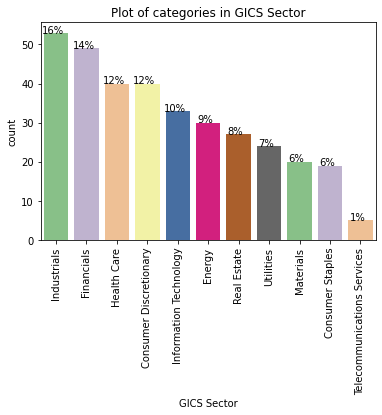

In [19]:
plot_categorical_feature(data, 'GICS Sector')

- 16% of the stocks are from the industrial sector, followed by financial sector with 14%.
- 12% of the stocks are from the healthcare and consumer discretionary sectors.
- Telecommunication sector stocks are the lowest at 1%.

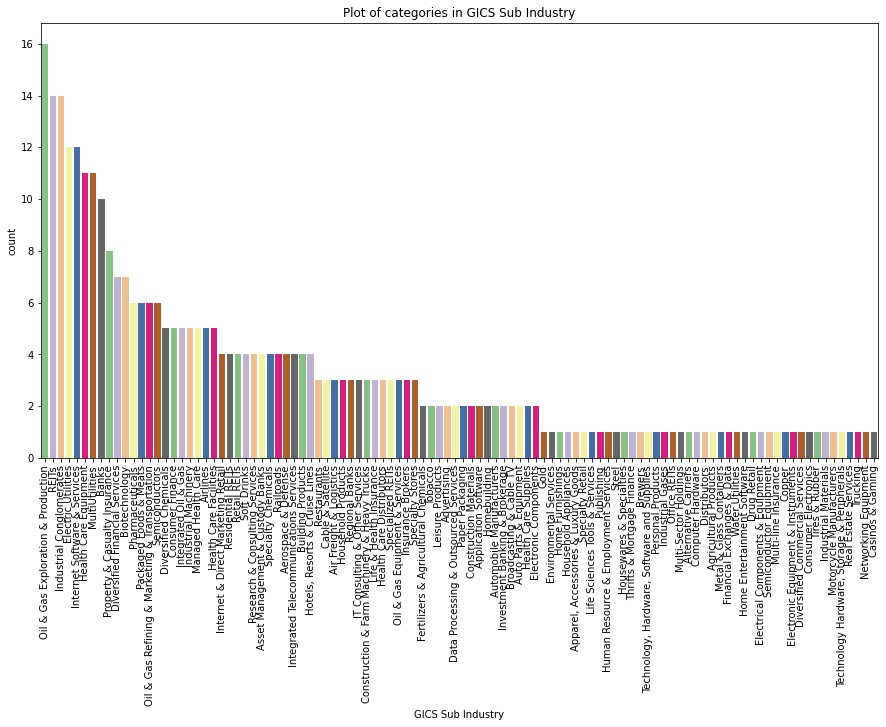

In [39]:
plt.figure(figsize=[15,8])
sns.countplot(data=data, x='GICS Sub Industry', palette='Accent', order=data['GICS Sub Industry'].value_counts().index);
plt.xticks(rotation=90)
plt.title('Plot of categories in GICS Sub Industry')
plt.show()

- 16 stocks are from oil and gas exploration and production sub industry.
- There are 14 stocks each from REITS and Industrial conglomerates sub industry.


### Bivariate Analysis

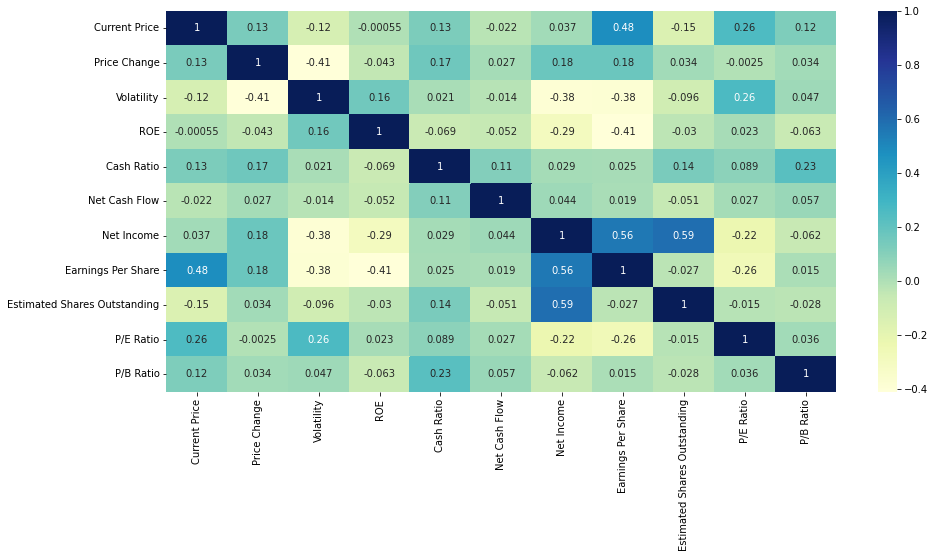

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=data.corr(), annot=True, cmap='YlGnBu');
plt.show()

- There is a weak correlation between the variables `Earning Per Share` and `Net Income`(0.56), and `Estimated Shares Outstanding` and `Net Income`(0.59).
- We do not observe much correlation between any other pair of variables in the given dataset.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

1. What does the distribution of stock prices look like?

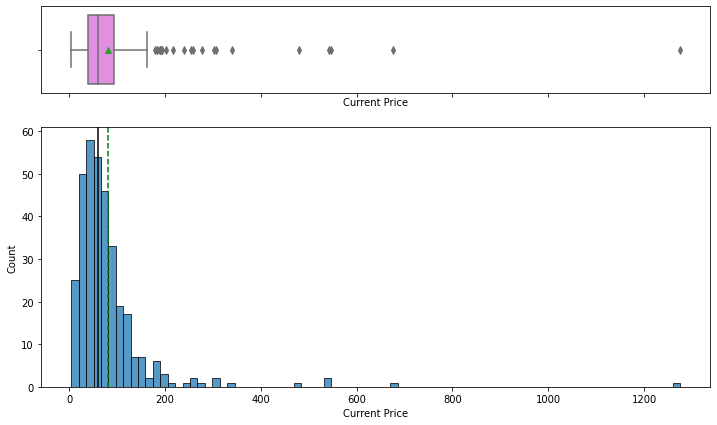

In [43]:
histogram_boxplot(data, 'Current Price')

- The distribution of `Current Price` is heavily right skewed.

2. The stocks of which economic sector have seen the maximum price increase on average?

In [14]:
data.groupby(by='GICS Sector')['Price Change'].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.58565
Consumer Staples                8.68475
Information Technology          7.21748
Telecommunications Services     6.95698
Real Estate                     6.20555
Consumer Discretionary          5.84609
Materials                       5.58974
Financials                      3.86541
Industrials                     2.83313
Utilities                       0.80366
Energy                        -10.22829
Name: Price Change, dtype: float64

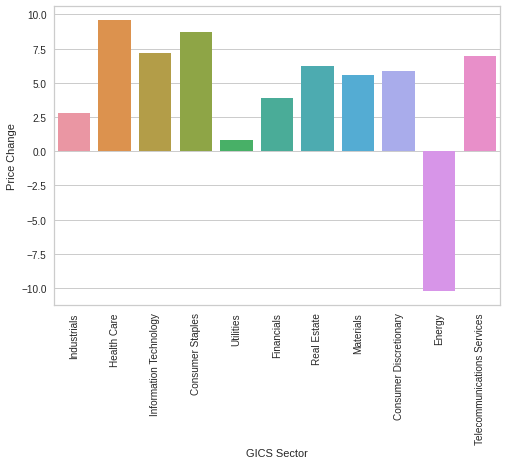

In [45]:
sns.barplot(data = data, x='GICS Sector', y='Price Change', ci=False);
plt.xticks(rotation=90);

- On an average, stocks of healthcare sector have the maximum price increase of about 9.585.
- Stocks of energy sector are towards the negative side of price change.

3. How are the different variables correlated with each other?

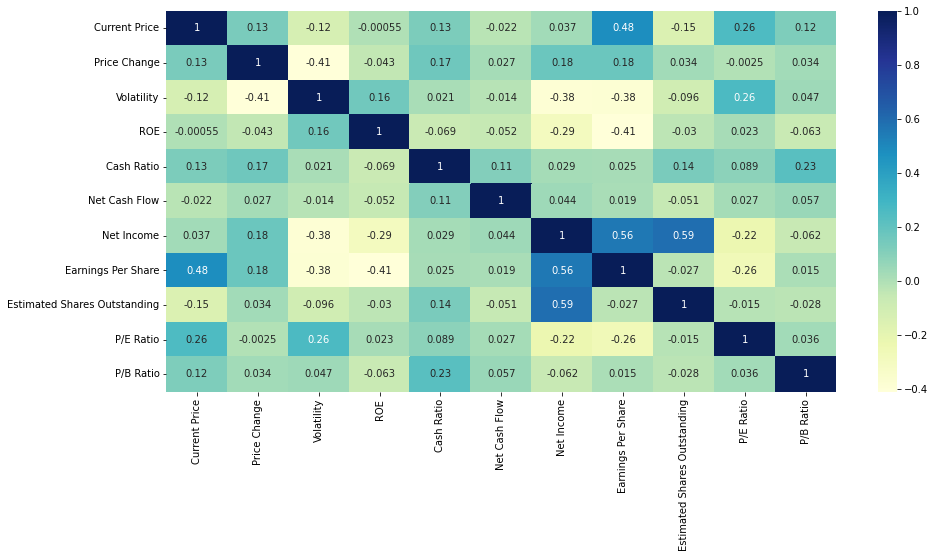

In [48]:
plt.figure(figsize=(15, 7))
sns.heatmap(data=data.corr(), annot=True, cmap='YlGnBu');
plt.show()

- There is a weak correlation between the variables `Earning Per Share` and `Net Income`(0.56), and `Estimated Shares Outstanding` and `Net Income`(0.59).
- We do not observe much correlation between any other pair of variables in the given dataset.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [15]:
data.groupby(by='GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology        149.81818
Telecommunications Services   117.00000
Health Care                   103.77500
Financials                     98.59184
Consumer Staples               70.94737
Energy                         51.13333
Real Estate                    50.11111
Consumer Discretionary         49.57500
Materials                      41.70000
Industrials                    36.18868
Utilities                      13.62500
Name: Cash Ratio, dtype: float64

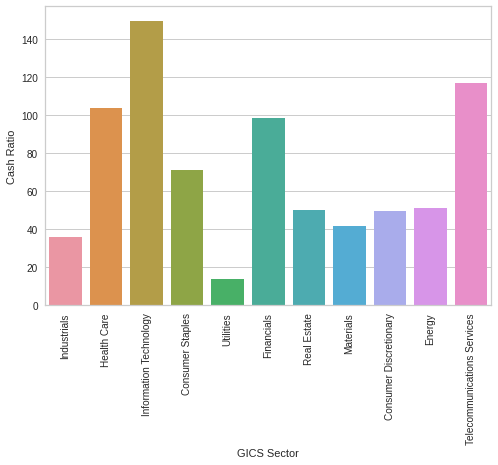

In [46]:
sns.barplot(data = data, x='GICS Sector', y='Cash Ratio', ci=False);
plt.xticks(rotation=90);

- The average cash ratio of Information Technology sector is the highest, with 149.818.
- This is followed by the telecommunications services sector with 117, and healthcare sector with 103.77.
- The average cash ratio of utilities sector is the lowest, with 13.625.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [16]:
data.groupby(by='GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                        72.89771
Information Technology        43.78255
Real Estate                   43.06558
Health Care                   41.13527
Consumer Discretionary        35.21161
Consumer Staples              25.52120
Materials                     24.58535
Utilities                     18.71941
Industrials                   18.25938
Financials                    16.02315
Telecommunications Services   12.22258
Name: P/E Ratio, dtype: float64

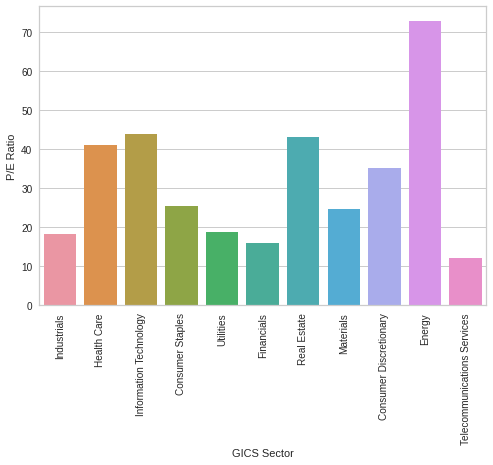

In [47]:
sns.barplot(data = data, x='GICS Sector', y='P/E Ratio', ci=False);
plt.xticks(rotation=90);

- The average P/E ratio of Energy sector is the highest, with 72.89.
- This is followed by the Information Technology sector and real estate sector, with about 43.
- The average P/E ratio of Telecommunications Services sector is the lowest, with 12.22.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

#### Duplicate value check

There are no duplicate values in the dataset.

#### Missing value treatment

There are no missing values in the dataset.

#### Outlier detection and treatment

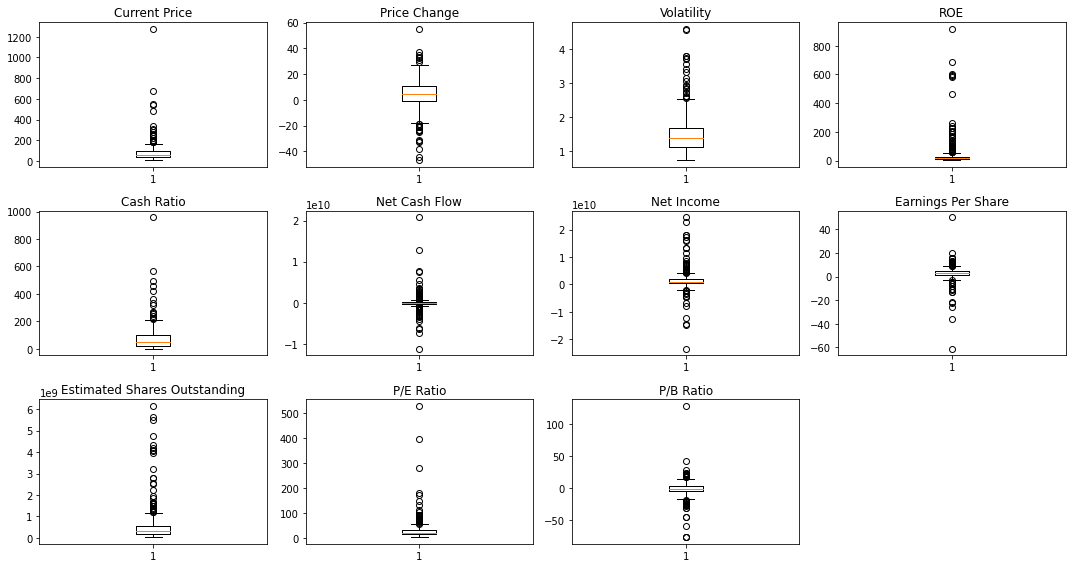

In [18]:
num_col_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=[15,8])

for i, variable in enumerate(num_col_list):
  plt.subplot(3,4,i+1)
  plt.boxplot(data[variable], whis=1.5);
  plt.tight_layout()
  plt.title(variable)

The data looks genuine, we are not treating any outliers.

#### Feature engineering


- Feature engineering is not required for this dataset.

#### Preprocessing Steps

Scaling numerical columns in the dataset before clustering

In [6]:
# scaling the data before clustering
scaler = StandardScaler()
dataAttr = data[num_cols].copy()
scaledData = scaler.fit_transform(dataAttr)

In [7]:
# creating a dataframe of the scaled data
dataAttrScaled = pd.DataFrame(scaledData, columns=dataAttr.columns)

In [8]:
dataAttrScaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.39334,0.49395,0.27275,0.98960,-0.21070,-0.33936,1.55442,1.30940,0.10786,-0.65249,-0.50665
1,-0.22084,0.35544,1.13704,0.93774,0.07727,-0.00233,0.92763,0.05675,1.25027,-0.31177,-0.50420
2,-0.36719,0.60248,-0.42701,-0.19290,-0.03349,0.45406,0.74437,0.02483,1.09802,-0.39150,0.09494
3,0.13357,0.82570,-0.28480,-0.31738,1.21806,-0.15250,-0.21982,-0.23056,-0.09162,0.94715,0.42433
4,-0.26087,-0.49264,0.29647,-0.26551,2.23702,0.13356,-0.20270,-0.37498,1.97840,3.29331,0.19920


## EDA

- It is a good idea to explore the data once again after manipulating it.

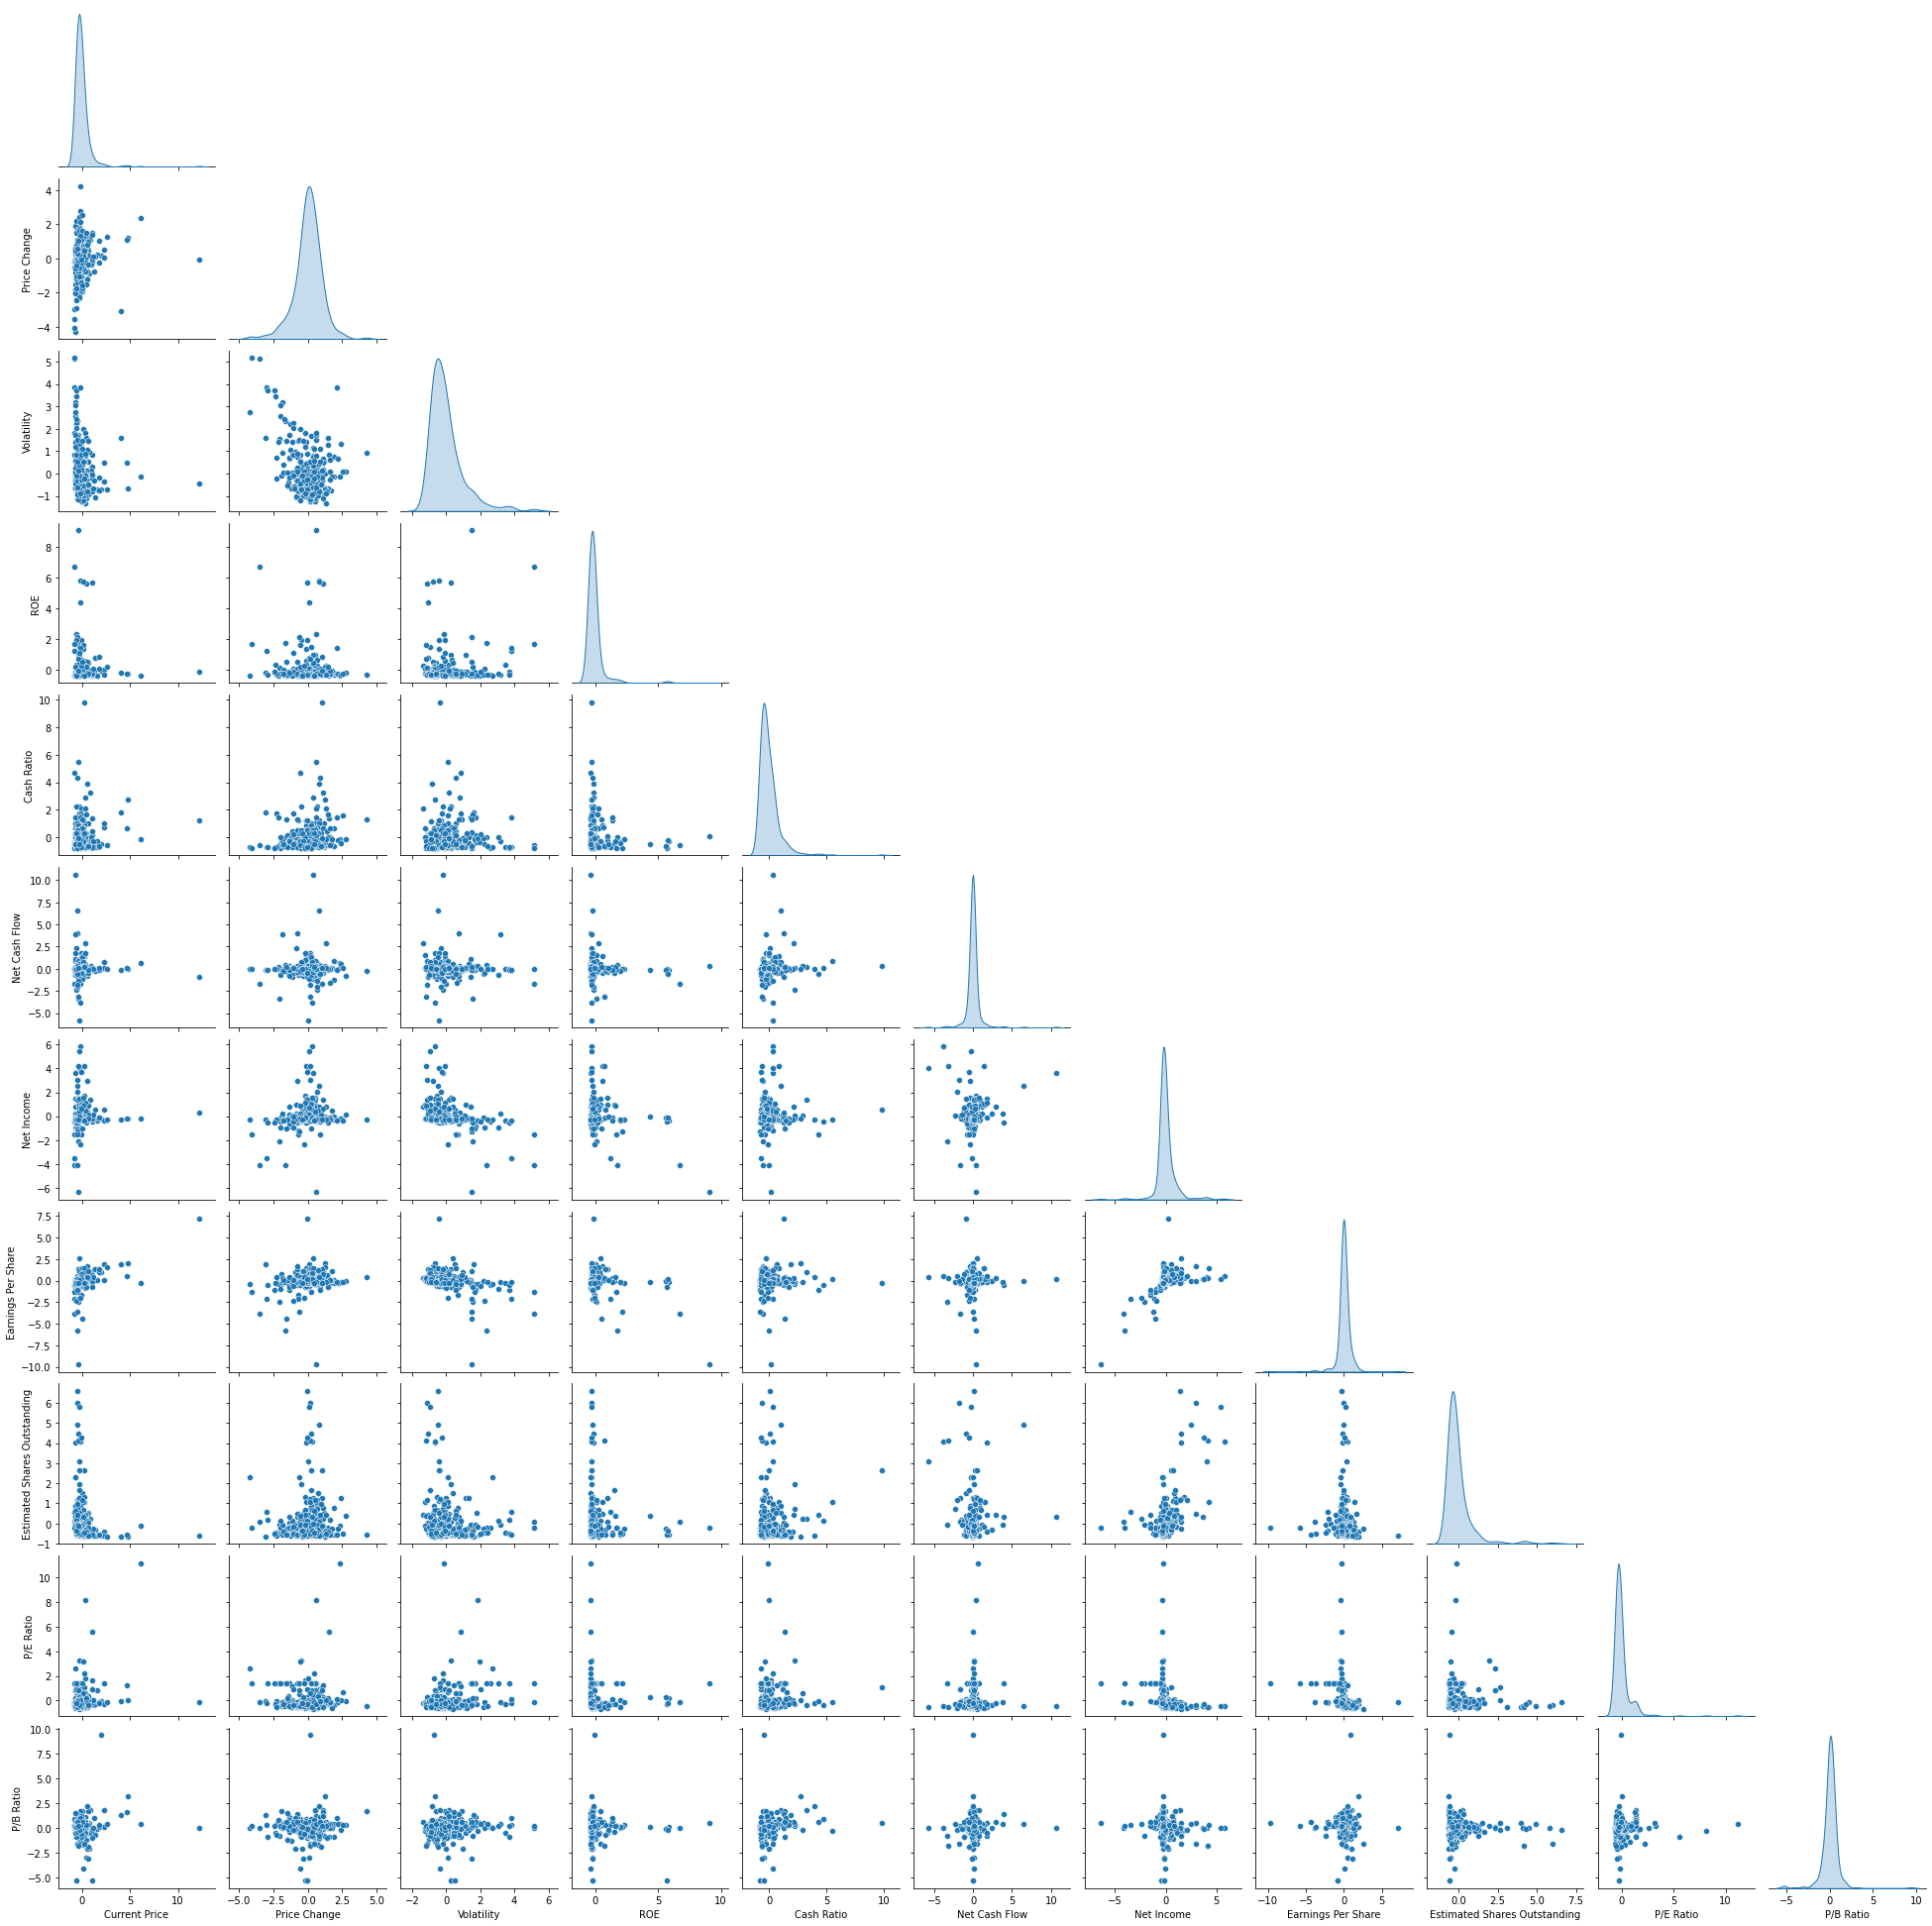

In [27]:
sns.pairplot(data=dataAttrScaled, diag_kind='kde', corner=True)

- We do not observe any relationship between the variables after manipulating the dataset.

## K-means Clustering

### Elbow plot

In [20]:
#creating a copy of the scaled data
k_means_df = dataAttrScaled.copy()

In [21]:
#importing libraries for kmeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

Number of Clusters: 1 	Average Distortion: 2.5449016002598364
Number of Clusters: 2 	Average Distortion: 2.3849341617150563
Number of Clusters: 3 	Average Distortion: 2.2719775413817493
Number of Clusters: 4 	Average Distortion: 2.18528395026415
Number of Clusters: 5 	Average Distortion: 2.1090806412196725
Number of Clusters: 6 	Average Distortion: 2.1030263744054785
Number of Clusters: 7 	Average Distortion: 2.0140711758306544
Number of Clusters: 8 	Average Distortion: 2.004376115591132
Number of Clusters: 9 	Average Distortion: 1.9409720445999472
Number of Clusters: 10 	Average Distortion: 1.867362330680551
Number of Clusters: 11 	Average Distortion: 1.7914071301027077
Number of Clusters: 12 	Average Distortion: 1.7784732810833783
Number of Clusters: 13 	Average Distortion: 1.7707682305229635
Number of Clusters: 14 	Average Distortion: 1.6839466931913367


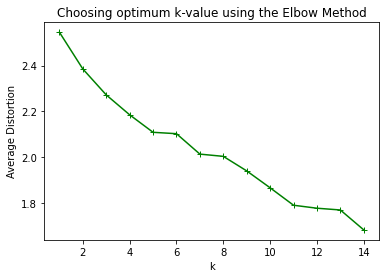

In [22]:
clusters = range(1, 15)
mean_distortions = []

for k in clusters:
  model = KMeans(n_clusters=k)
  model.fit(dataAttrScaled)
  prediction = model.predict(k_means_df)
  distortion = sum(np.min(cdist(dataAttrScaled, model.cluster_centers_, 'euclidean'), axis=1))/dataAttrScaled.shape[0]
  mean_distortions.append(distortion)
  print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

#plotting the elbow curve
plt.plot(clusters, mean_distortions, "g+-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Choosing optimum k-value using the Elbow Method")
plt.show()

- From the elbow curve, we do not have a clear idea on the appropriate value for k.

In [23]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

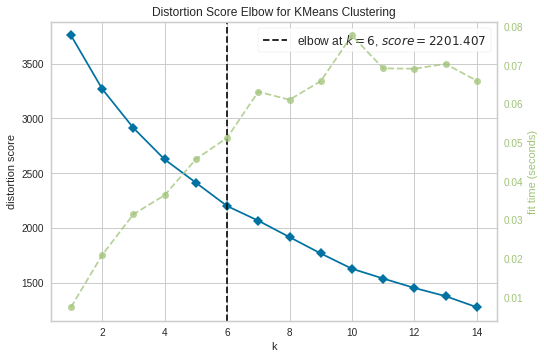

In [24]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True, locate_elbow=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Using Silhouette score

In [25]:
#importing library for silhoutte score
from sklearn.metrics import silhouette_score

For n_clusters = 2, silhouette score is 0.4399813916330171
For n_clusters = 3, silhouette score is 0.46259388633433585
For n_clusters = 4, silhouette score is 0.45278729008343316
For n_clusters = 5, silhouette score is 0.4112562739623508
For n_clusters = 6, silhouette score is 0.42176938928019164
For n_clusters = 7, silhouette score is 0.41891497843779396
For n_clusters = 8, silhouette score is 0.40120192030088536
For n_clusters = 9, silhouette score is 0.3985603824038516
For n_clusters = 10, silhouette score is 0.3637530481182034
For n_clusters = 11, silhouette score is 0.16189384759456046
For n_clusters = 12, silhouette score is 0.12497234021832748
For n_clusters = 13, silhouette score is 0.19580145553511624
For n_clusters = 14, silhouette score is 0.12542342003224347


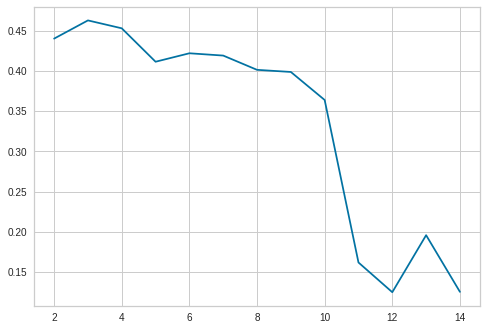

In [26]:
#checking silhoutte scores
sil_score = []
cluster_list = list(range(2, 15))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((dataAttrScaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(dataAttrScaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

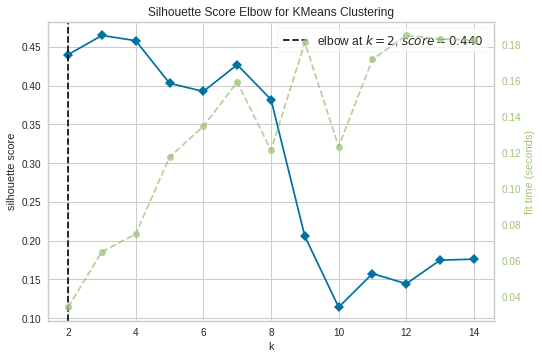

In [27]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

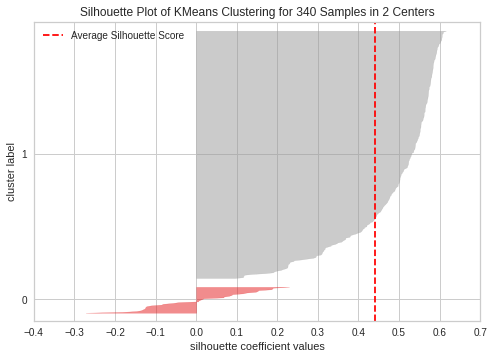

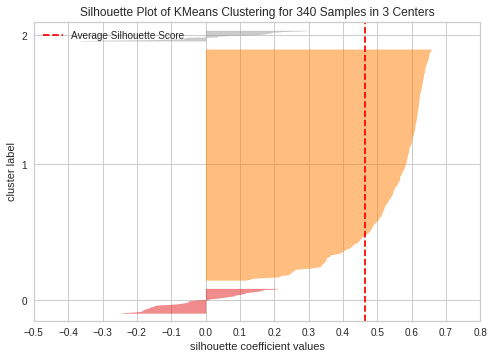

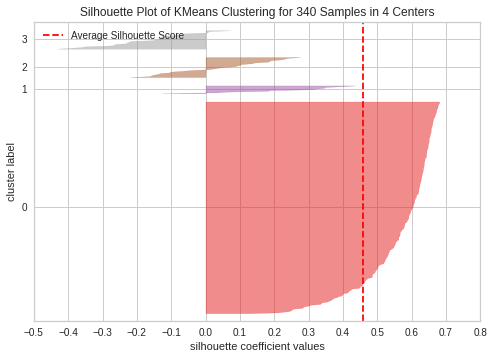

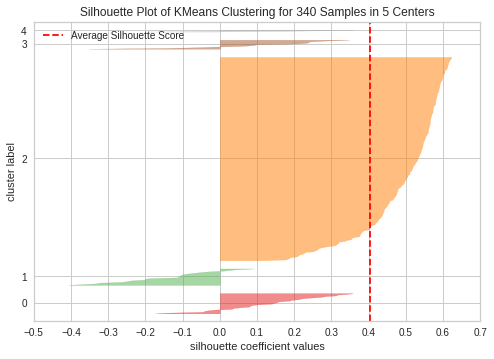

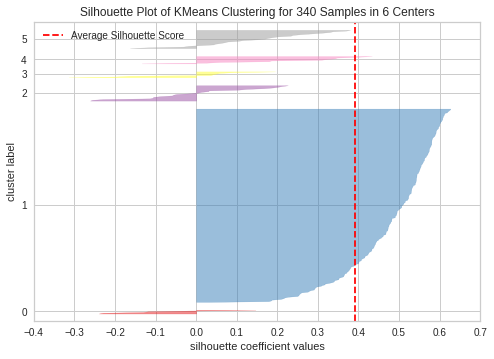

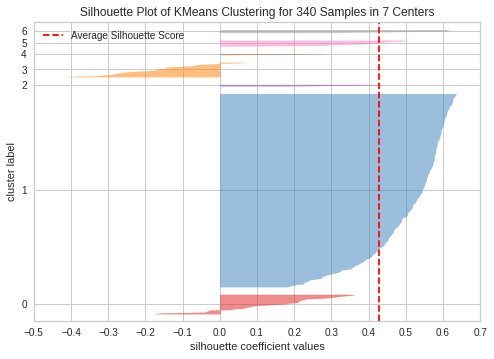

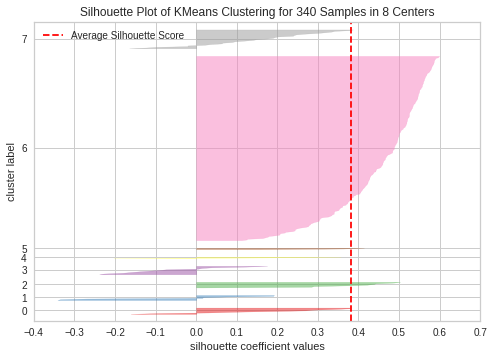

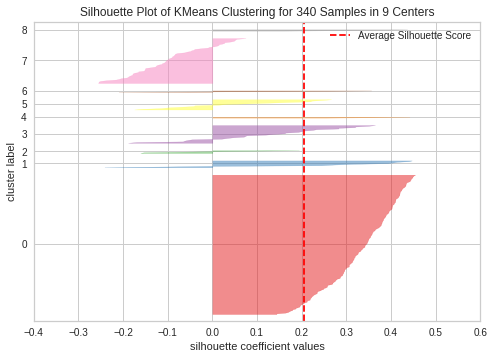

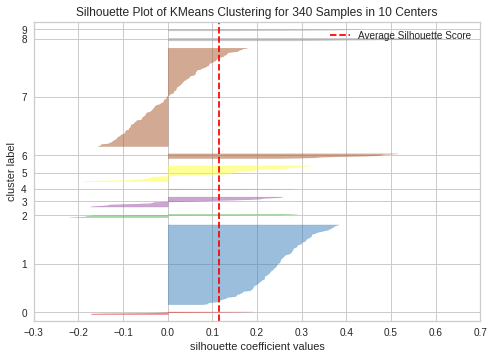

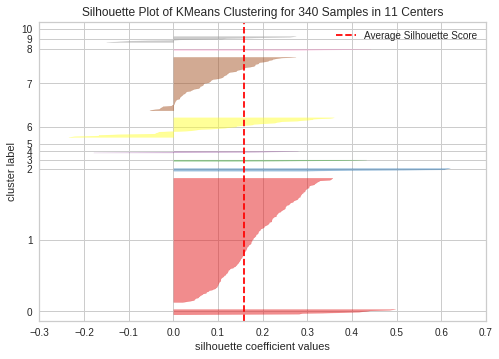

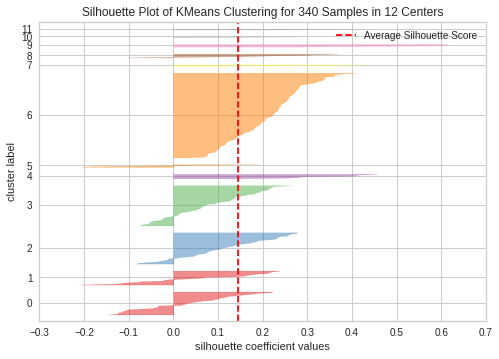

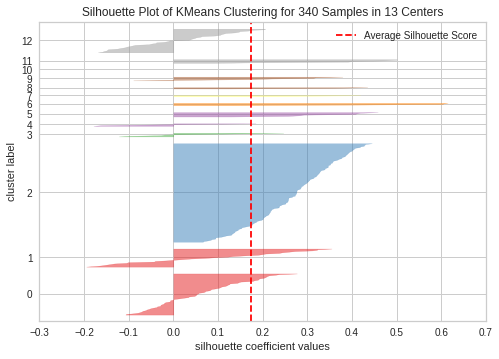

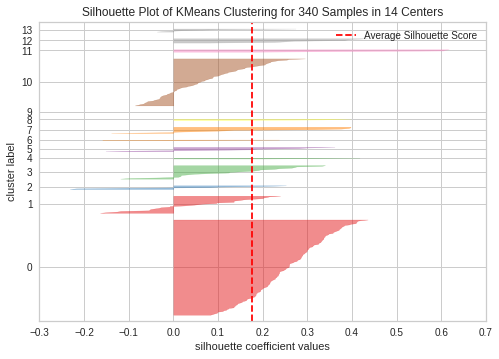

In [28]:
# finding optimal no. of clusters with silhouette coefficients
for opt_k in range(2, 15):
  visualizer = SilhouetteVisualizer(KMeans(opt_k, random_state=1))
  visualizer.fit(k_means_df)
  visualizer.show()

### Creating final K-Means model

In [29]:
# final K-means model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [30]:
# creating a copy of the original data
df1 = data.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [31]:
df1.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.35000,9.99999,1.68715,135,51,-604000000,7610000000,11.39000,668129938.50000,3.71817,-8.78422,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24000,8.33943,2.19789,130,77,51000000,5144000000,3.15000,1633015873.00000,18.80635,-8.75007,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91000,11.30112,1.27365,21,67,938000000,4423000000,2.94000,1504421769.00000,15.27551,-0.39417,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94000,13.97720,1.35768,9,180,-240840000,629551000,1.26000,499643650.80000,74.55556,4.19965,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32000,-1.82786,1.70117,14,272,315120000,696878000,0.31000,2247993548.00000,178.45161,1.05981,3


### Cluster profiling

In [32]:
km_cluster_profile = df1.groupby("KM_segments").mean()
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [49]:
# let's see the names of the Security in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following security are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print(df1[df1["KM_segments"] == cl]["Security"].nunique())
    print()


In cluster 0, the following security are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle

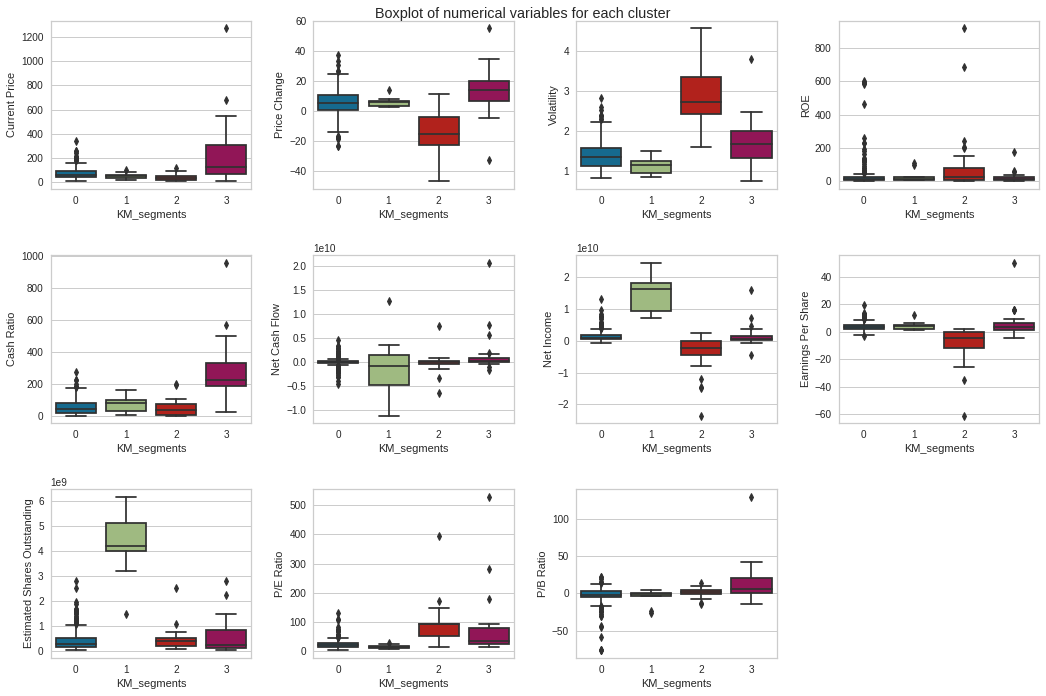

In [34]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- K-Means clustering method groups the stocks into 4 unique clusters.
- Cluster 0 has 277, Cluster 1 has 11, Cluster 2 has 27 and Cluster 3 has 25 stocks. Stocks are properly clustered, and not repeating in different clusters.

## Hierarchical Clustering

In [8]:
#creating a copy of the scaled data
hc_df = dataAttrScaled.copy()

In [9]:
#importing libraries for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [10]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

Checking different linkages for Euclidean distance

In [11]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(dataAttrScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(dataAttrScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation for Euclidean distance is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Highest cophenetic correlation for Euclidean distance is 0.9422540609560814, which is obtained with average linkage.


- We observe that the highest cophenetic correlation is 0.942254, obtained using Euclidean distance with average linkage.

### Dendrograms

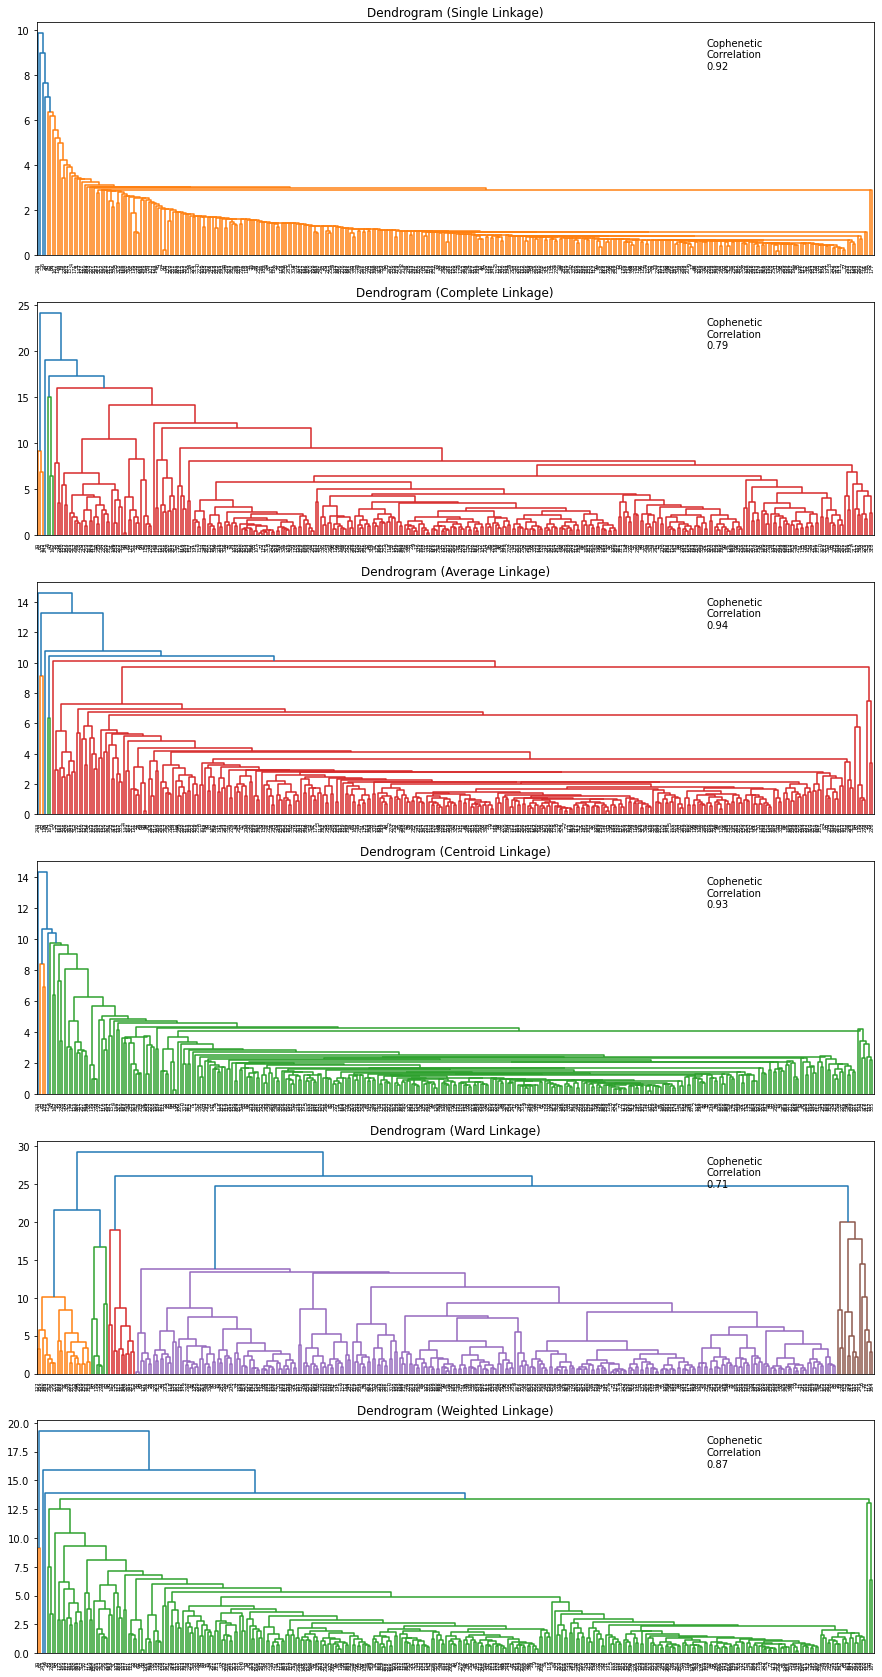

In [12]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

- The cophenetic correlation is highest for average linkage methods.
- Hence we choose average linkage.
- 4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating model

In [13]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(dataAttrScaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [14]:
dataAttrScaled["HC_Clusters"] = HCmodel.labels_
df2 = data.copy()
df2["HC_Clusters"] = HCmodel.labels_

In [15]:
df2.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_Clusters
0,AAL,American Airlines Group,Industrials,Airlines,42.35000,9.99999,1.68715,135,51,-604000000,7610000000,11.39000,668129938.50000,3.71817,-8.78422,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24000,8.33943,2.19789,130,77,51000000,5144000000,3.15000,1633015873.00000,18.80635,-8.75007,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91000,11.30112,1.27365,21,67,938000000,4423000000,2.94000,1504421769.00000,15.27551,-0.39417,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94000,13.97720,1.35768,9,180,-240840000,629551000,1.26000,499643650.80000,74.55556,4.19965,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32000,-1.82786,1.70117,14,272,315120000,696878000,0.31000,2247993548.00000,178.45161,1.05981,0


### Cluster Profiling

In [19]:
cluster_profile = df2.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_Clusters")["Security"].count().values
)
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.573266,4.148438,1.515708,35.184524,67.154762,67104693.452381,1607391086.309524,2.905640,572317821.413095,32.325679,-1.762402,336
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1


In [50]:
# let's see the names of the Security in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following security are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Security"].unique())
    print(df2[df2["HC_Clusters"] == cl]["Security"].nunique())
    print()

In cluster 0, the following security are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC In

### Insights

- Hierarchical clustering method also groups the stocks into 4 unique clusters, using Euclidean distance and average linkage.
- Cluster 0 has 336, Cluster 1 has 1, Cluster 2 has 2 and Cluster 3 has 1 stocks. 
- Although Euclidean distance and average linkage gives highest cophenetic correlation, stocks do not look properly clustered. One cluster contains too many stocks while other clusters have very low number of stocks.

## K-means vs Hierarchical Clustering

- Both the clustering techniques group the stocks into 4 unique clusters.
- K-Means groups stocks such that Cluster 0 has 277, Cluster 1 has 11, Cluster 2 has 27 and Cluster 3 has 25 stocks. Hierarchical clustering groups stocks such that Cluster 0 has 336, Cluster 1 has 1, Cluster 2 has 2 and Cluster 3 has 1 stocks.
- Elbow and Silhouette methods were used to determine the optimal number of clusters (K) for K-Means, but Hierarchical clustering has no such requirements. The algorithm on itself deduces the optimum number of cluster and displays it form of dendrogram. Hierarchical clustering using Euclidean distance and average linkage gives highest cophenetic correlation.
- K-Means clustering is tedious as there are so many steps before the actual clustering process. Hierarchical clustering is comparatively more easier.

## Actionable Insights and Recommendations



- Although Hierarchical clustering with Euclidean distance and average linkage gives highest cophenetic correlation, stocks do not look properly clustered. Hence, we choose K-Means clustering technique.
- Cluster 0 stocks have have medium current price, medium volatility, medium ROE, and medium P/E ratio.
- Cluster 1 stocks have medium current price, medium volatility, medium ROE, and medium P/E ratio. But they have high net income and high estimated outstanding shares.
- Cluster 2 stocks have lowest current price, high volatility, high ROE, and high P/E ratio.
- Cluster 3 stocks have high current price, medium volatility, high cash ratio, high cash net flow and high earnings per share.
- Its good to maintain stocks in all clusters, with a good amount of shares in low or medium current price and a few shares in high current price for the best returns.
- Youngsters can prefer cluster 2 stocks, as they can afford stocks with low current price and high volatility, and get good returns on their investment.
- Middle aged groups can prefer cluster 0 or 1 stocks, as they can afford medium current price. These stocks have medium volatility and can give good returns.
- People with very good financial status can try investing in Cluster 3 stocks as they have high current price, medium volatility and high earnings per share.